In [1]:
# Important Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')

Read Dataset

In [132]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Display the first few rows of the dataset
df.head()


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (10000, 21)


In [5]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

Data Cleaning

In [7]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [8]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


Data Visualization

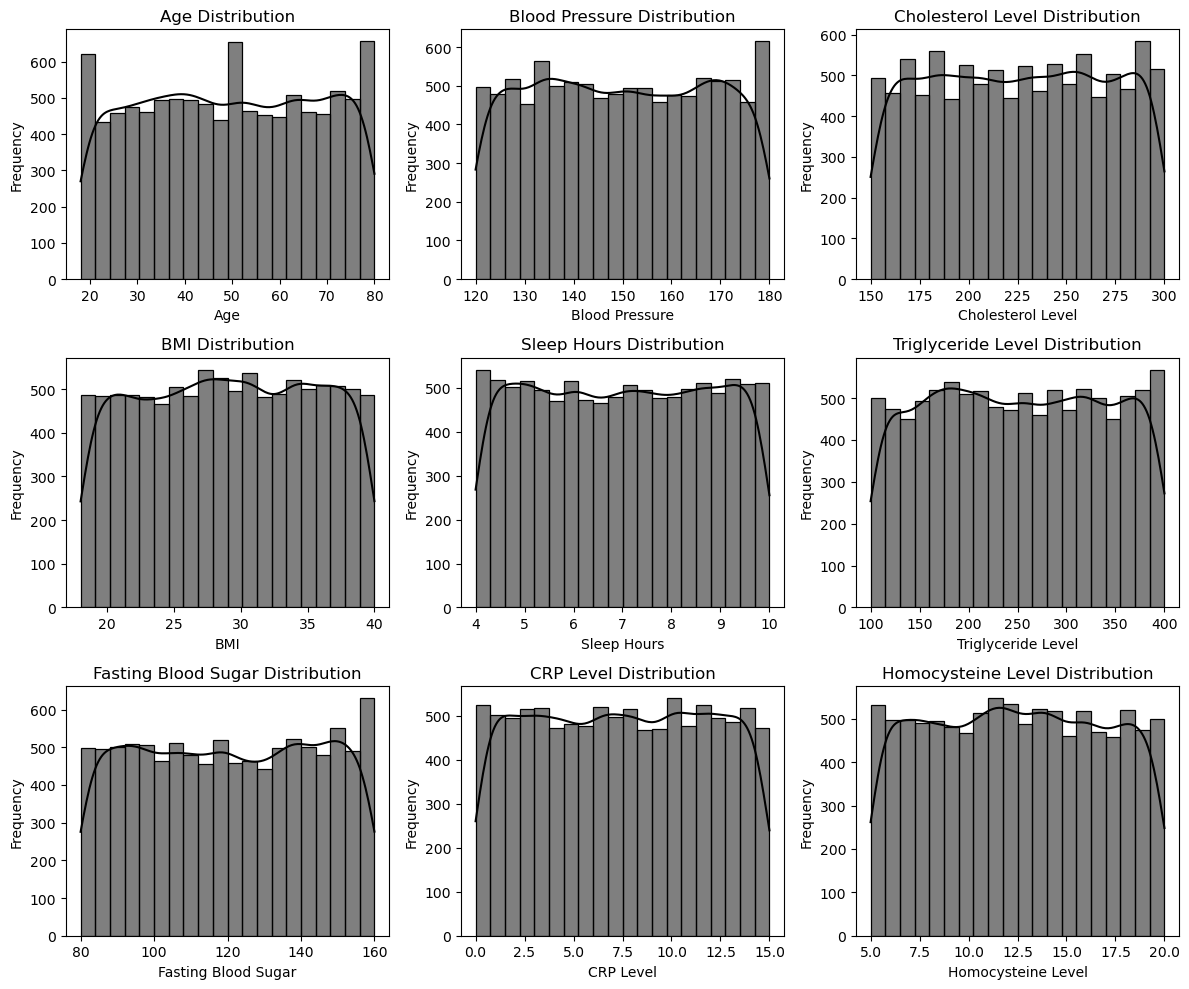

In [10]:
# Plot distributions of numeric columns
numeric_columns = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI','Sleep Hours' ,'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']


plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, color="black", bins=20)  
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

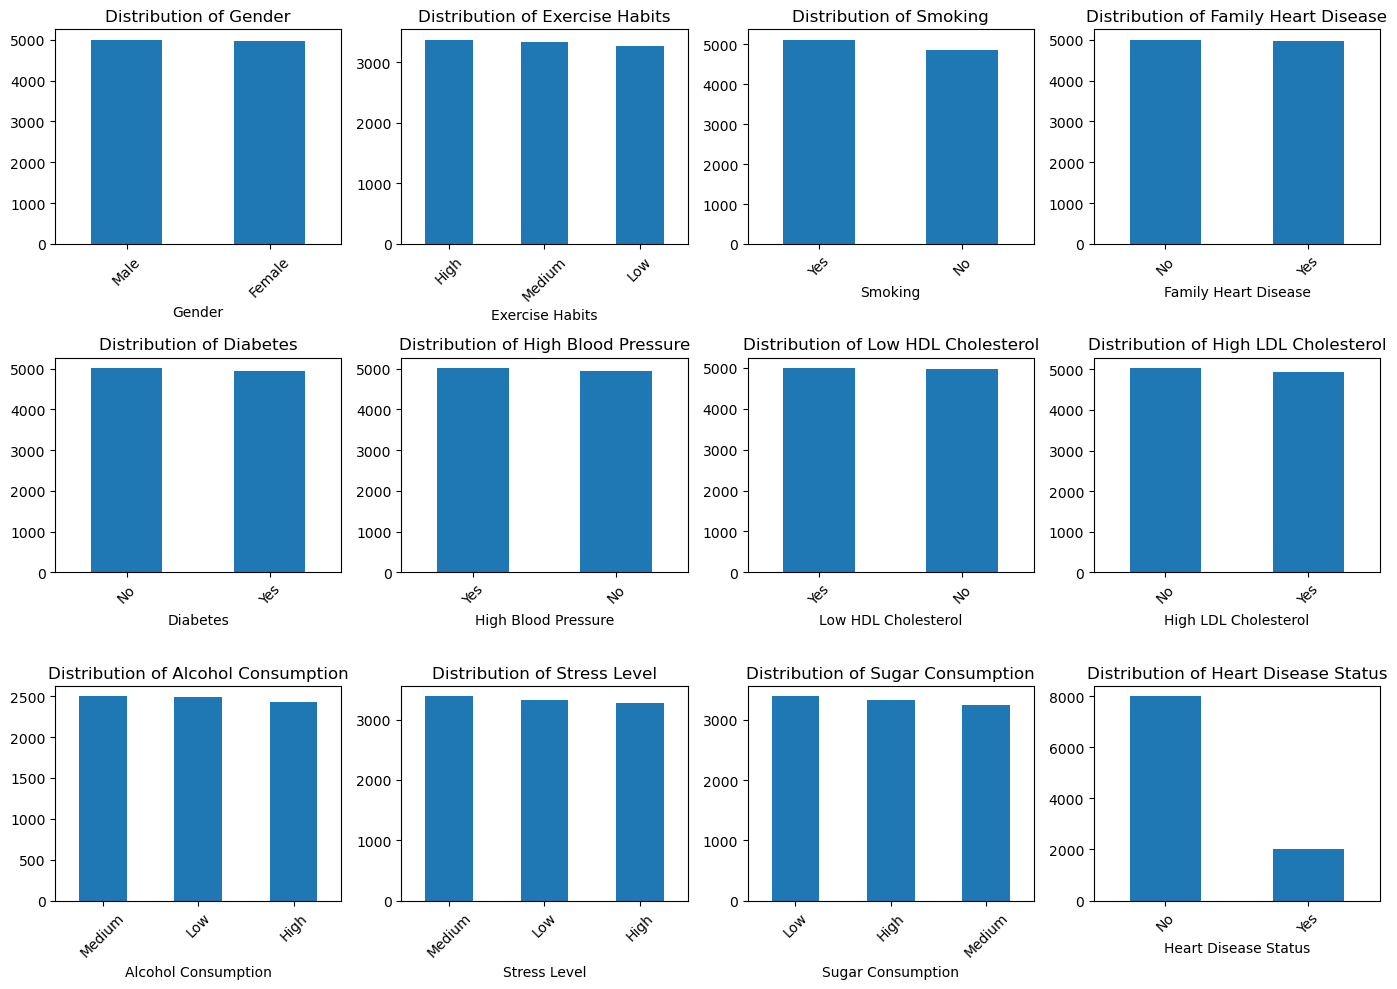

In [11]:
#Plot distributions of categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

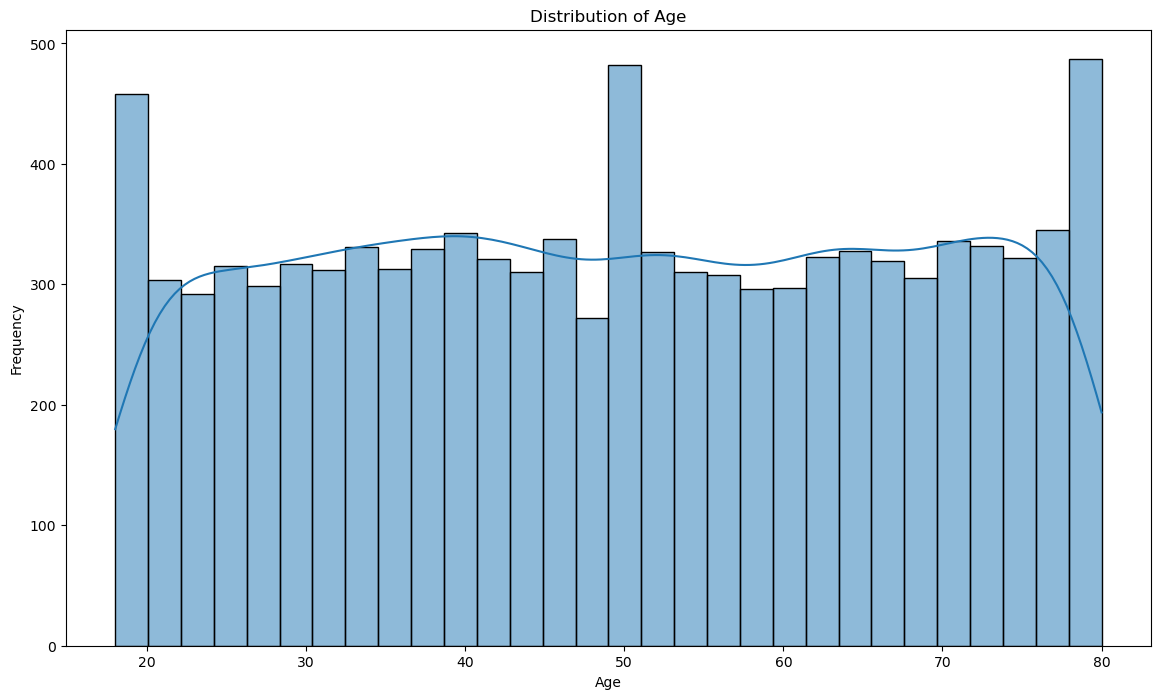

In [12]:
# Univariate analysis
plt.figure(figsize=(14, 8))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

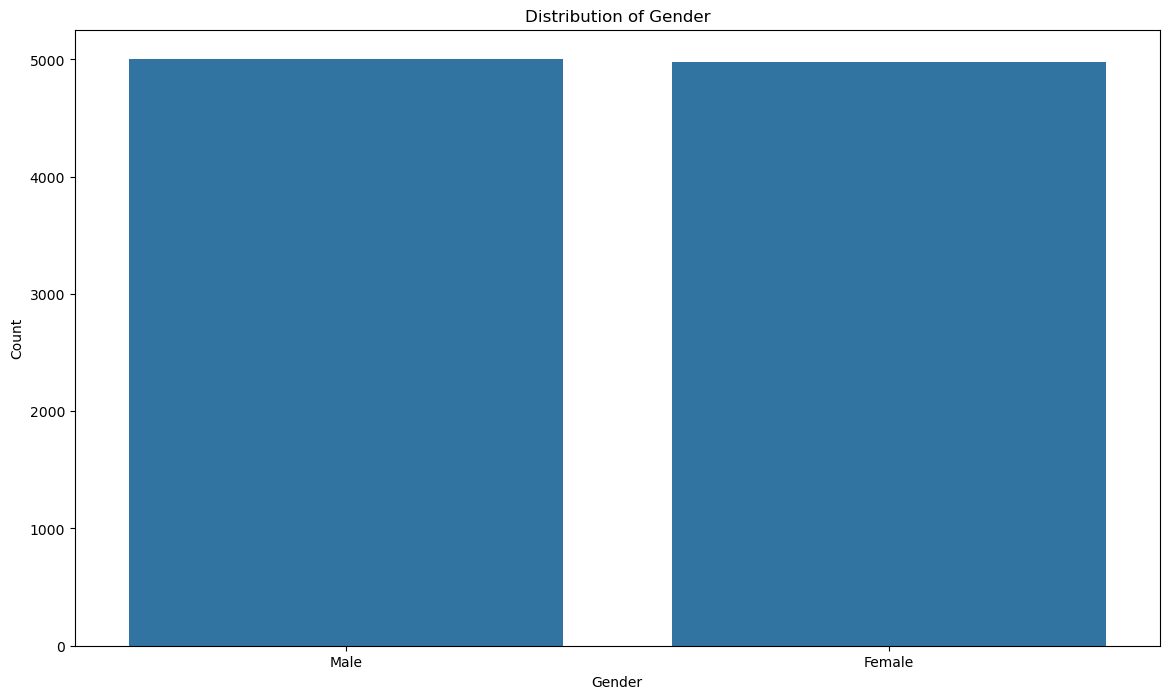

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

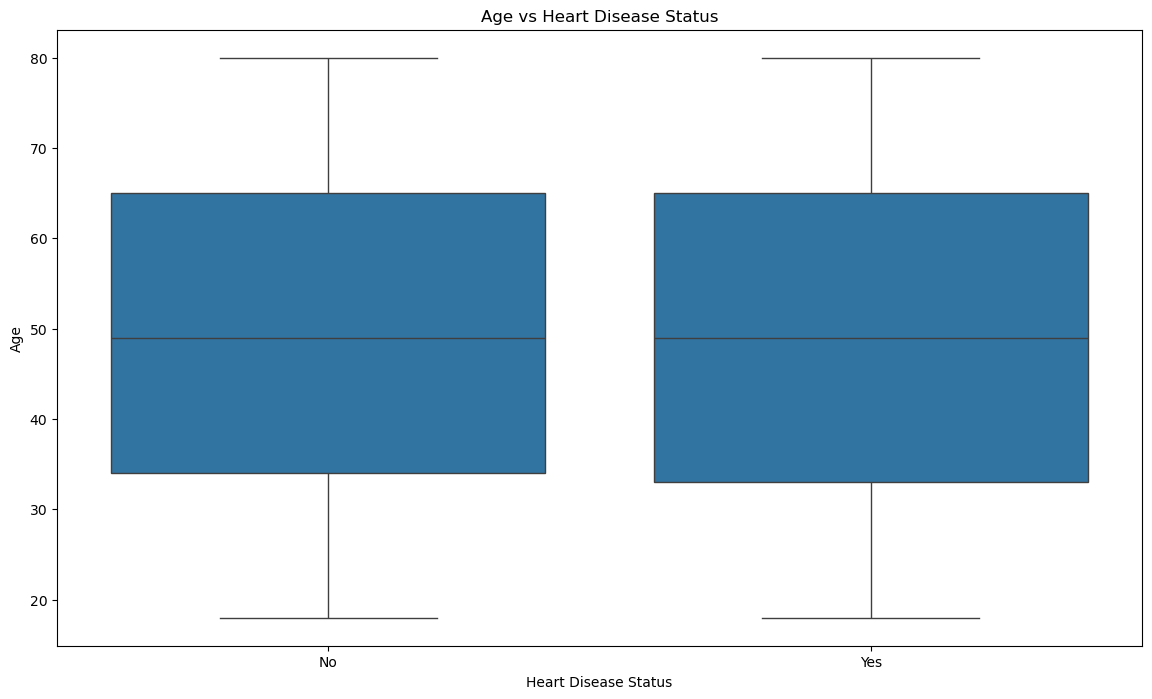

In [14]:
# Bivariate analysis
plt.figure(figsize=(14, 8))
sns.boxplot(x='Heart Disease Status', y='Age', data=df)
plt.title('Age vs Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.show()

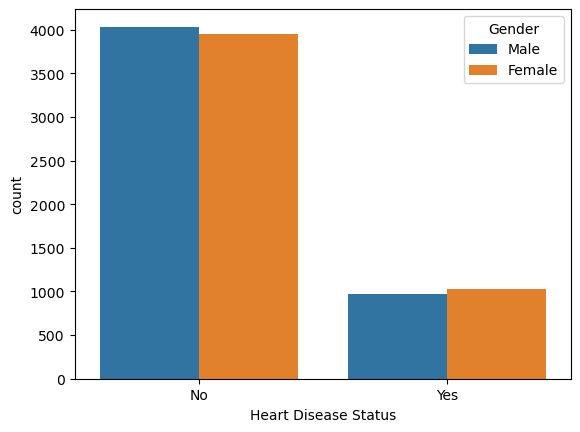

In [15]:
# Number of people have heart disease
sns.countplot(x='Heart Disease Status',data=df,hue='Gender')
df['Heart Disease Status'].value_counts()
plt.show()

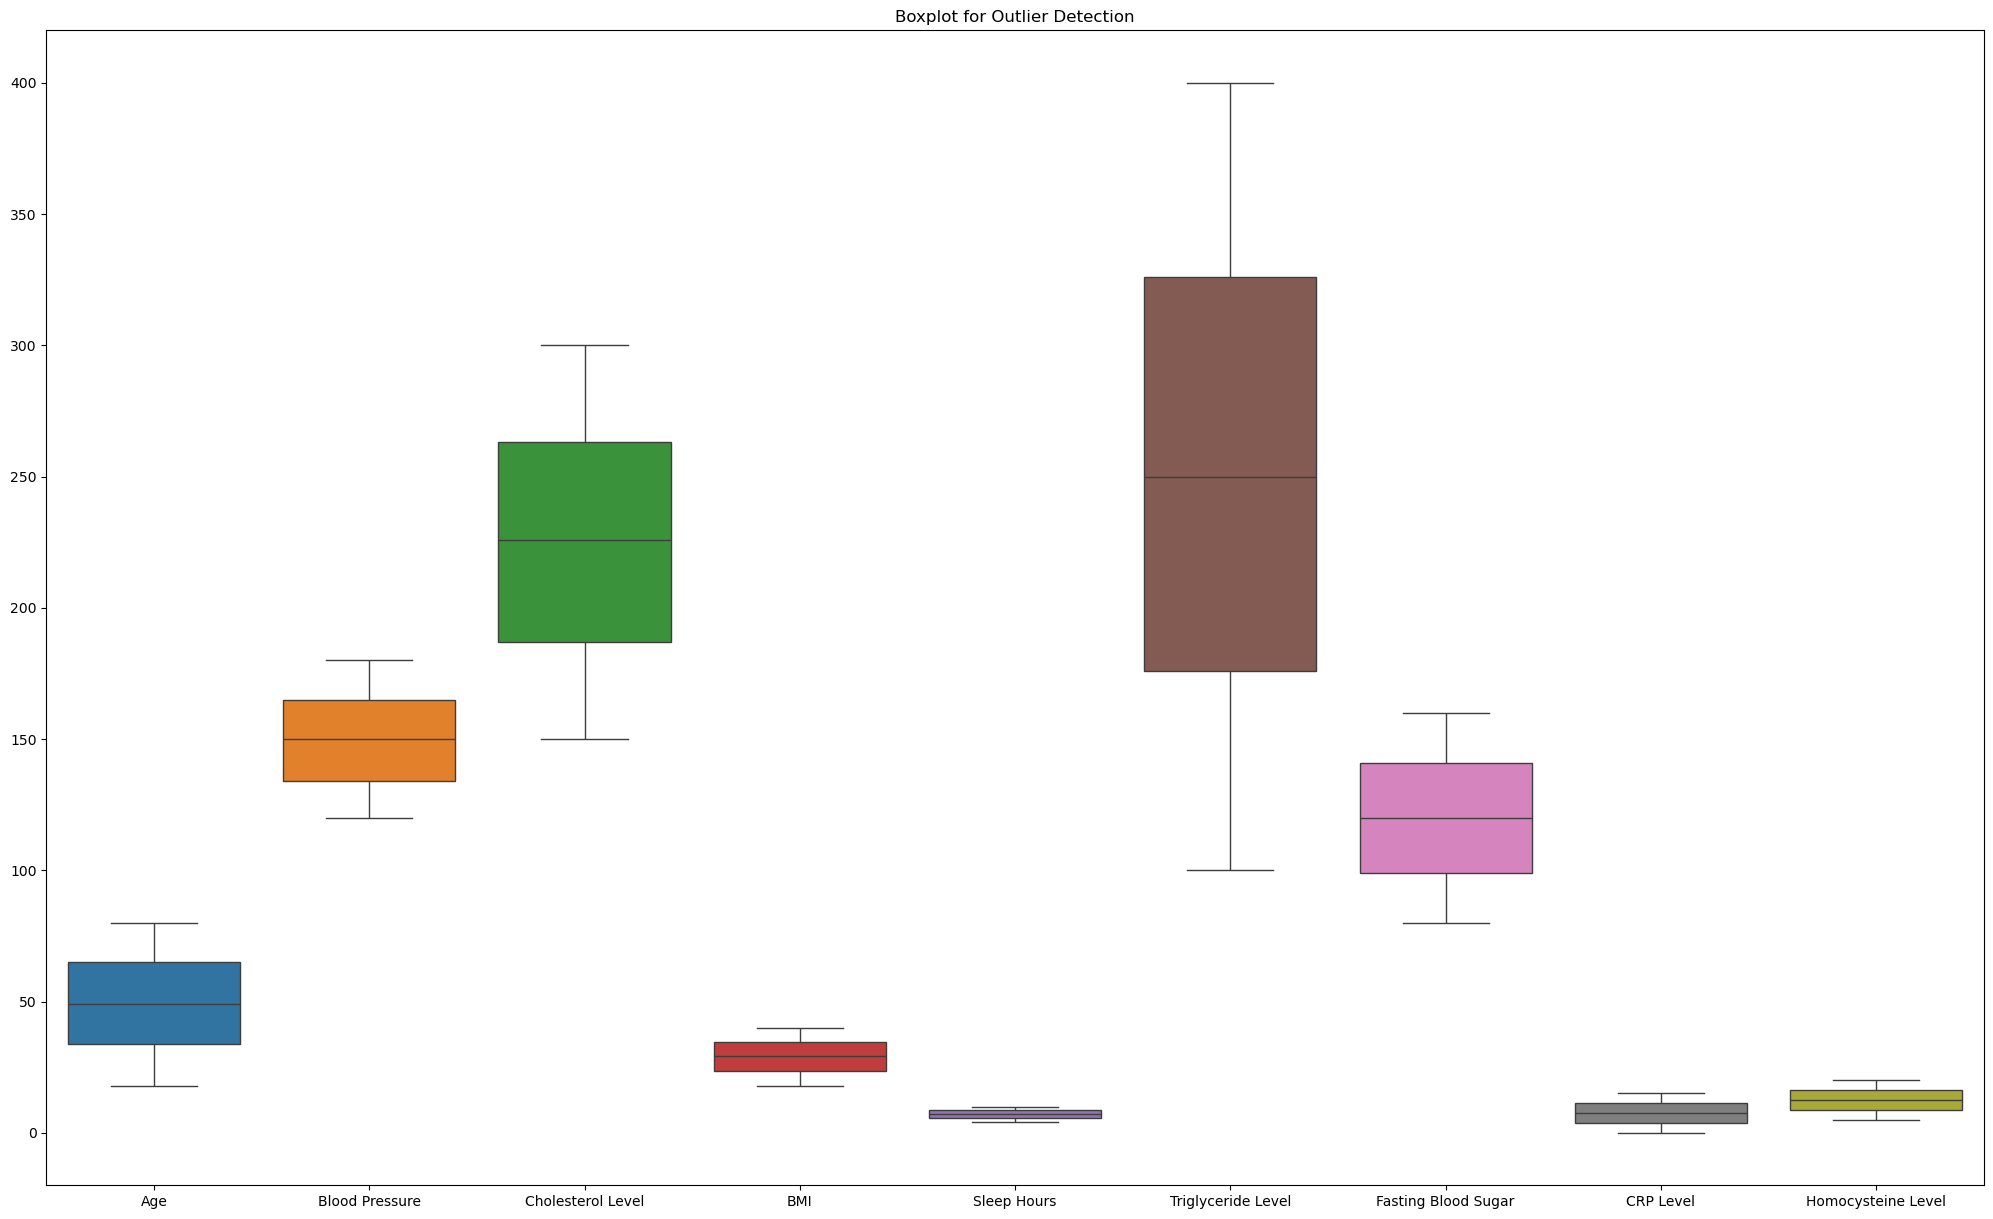

In [16]:
# Outlier detection with visualization
plt.figure(figsize=(25, 15))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()

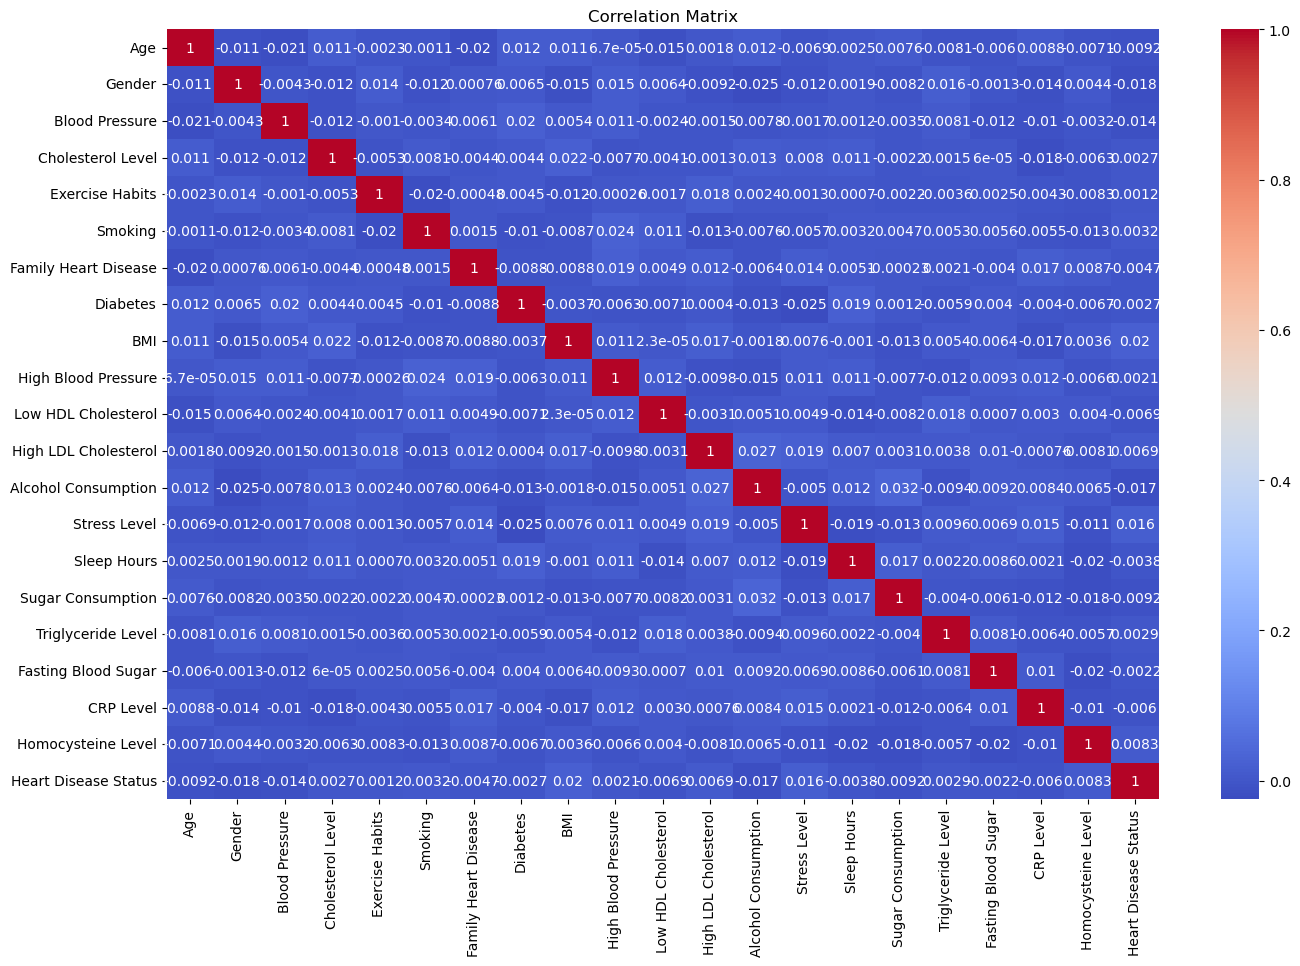

In [17]:
# Correlation matrix
# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

plt.figure(figsize=(16, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Data Preprocessing

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
label_mappings = {}

for col in categorical_cols:
    mask = df[col].notna()

    df.loc[mask, col] = encoder.fit_transform(df.loc[mask, col])

    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [20]:
print(f"Missing values count is: {df.isnull().sum().sum()}")

Missing values count is: 219


In [21]:
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_imputed)
df = df_imputed

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0     1.0           153.0              155.0              0.0   
1     69.0     0.0           146.0              286.0              0.0   
2     46.0     1.0           126.0              216.0              1.0   
3     32.0     0.0           122.0              293.0              0.0   
4     60.0     1.0           166.0              242.0              1.0   
...    ...     ...             ...                ...              ...   
9995  25.0     0.0           136.0              243.0              2.0   
9996  38.0     1.0           172.0              154.0              2.0   
9997  73.0     1.0           152.0              201.0              0.0   
9998  23.0     1.0           142.0              299.0              1.0   
9999  38.0     0.0           128.0              193.0              2.0   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0         1.0                 

In [22]:
# Features and target variable
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']

In [23]:
# Use SMOTE for balancing the data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
#split the dataset with ratios 80:20 with random state 42
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Standardization

In [26]:
scaler = MinMaxScaler()

Grade_column = df['Heart Disease Status']
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

df['Heart Disease Status'] = Grade_column

Model Training and Hyperparameter Tuning

1- Random Forest Model

In [29]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [30]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [31]:
# Set up Grid Search
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)

In [32]:
# Fit the Grid Search
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [33]:
# Best Parameters and Accuracy for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8306250000000001


In [34]:
# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8445833333333334
Confusion Matrix:
 [[1617    0]
 [ 373  410]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      1617
         1.0       1.00      0.52      0.69       783

    accuracy                           0.84      2400
   macro avg       0.91      0.76      0.79      2400
weighted avg       0.87      0.84      0.83      2400



In [35]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

In [36]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [37]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                  Feature  Importance
1                 Gender    0.065898
11  High LDL Cholesterol    0.062725
5                Smoking    0.060155
8                    BMI    0.057081
10   Low HDL Cholesterol    0.056196
19    Homocysteine Level    0.056095
18             CRP Level    0.056078
14           Sleep Hours    0.055616
16    Triglyceride Level    0.055148
3      Cholesterol Level    0.055042
9    High Blood Pressure    0.053898
17   Fasting Blood Sugar    0.052093
0                    Age    0.049966
2         Blood Pressure    0.049659
7               Diabetes    0.039303
12   Alcohol Consumption    0.039177
13          Stress Level    0.037393
6   Family Heart Disease    0.037001
15     Sugar Consumption    0.032483
4        Exercise Habits    0.028992


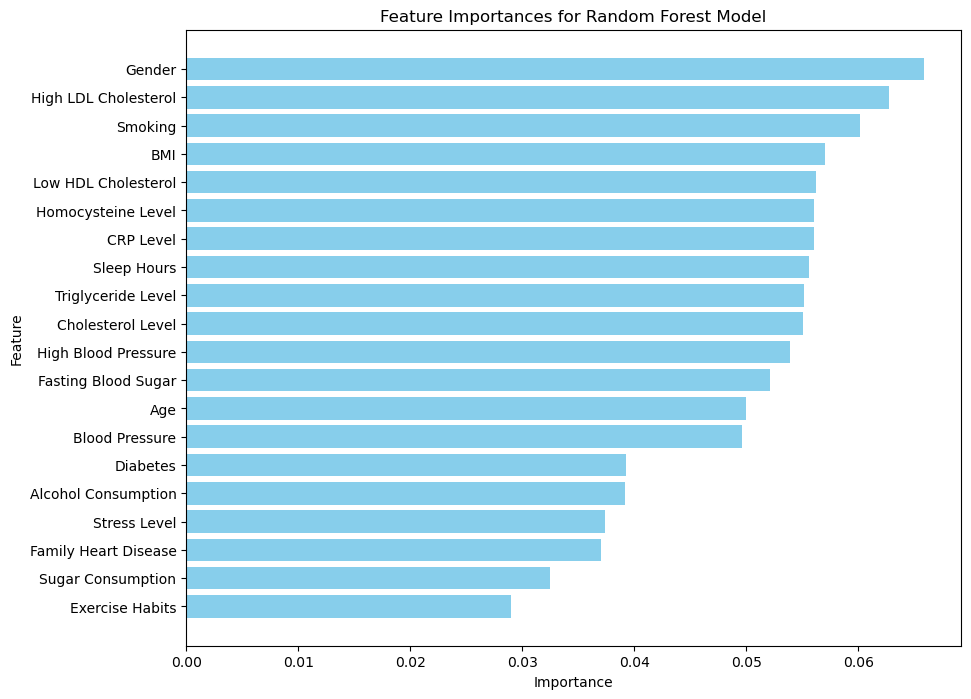

In [38]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Model')
plt.gca().invert_yaxis()  
plt.show()

2- Decision Tree Model

In [40]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

In [41]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [42]:
# Set up Grid Search
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1)

In [43]:
# Fit the Grid Search
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
# Best Parameters and Accuracy for Decision Tree
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy:", grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.7817708333333334


In [45]:
# Evaluate the best model on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Model Accuracy: 0.8079166666666666
Confusion Matrix:
 [[1577   40]
 [ 421  362]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.98      0.87      1617
         1.0       0.90      0.46      0.61       783

    accuracy                           0.81      2400
   macro avg       0.84      0.72      0.74      2400
weighted avg       0.83      0.81      0.79      2400



In [46]:
# Get feature importances
feature_importances = best_dt_model.feature_importances_

In [47]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [48]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                  Feature  Importance
10   Low HDL Cholesterol    0.310647
1                 Gender    0.234093
7               Diabetes    0.090729
4        Exercise Habits    0.075956
9    High Blood Pressure    0.038695
18             CRP Level    0.029243
3      Cholesterol Level    0.029154
11  High LDL Cholesterol    0.024881
16    Triglyceride Level    0.024435
19    Homocysteine Level    0.022795
14           Sleep Hours    0.018849
17   Fasting Blood Sugar    0.017831
8                    BMI    0.016549
2         Blood Pressure    0.014801
13          Stress Level    0.013608
12   Alcohol Consumption    0.012550
0                    Age    0.010817
5                Smoking    0.008962
15     Sugar Consumption    0.005184
6   Family Heart Disease    0.000222


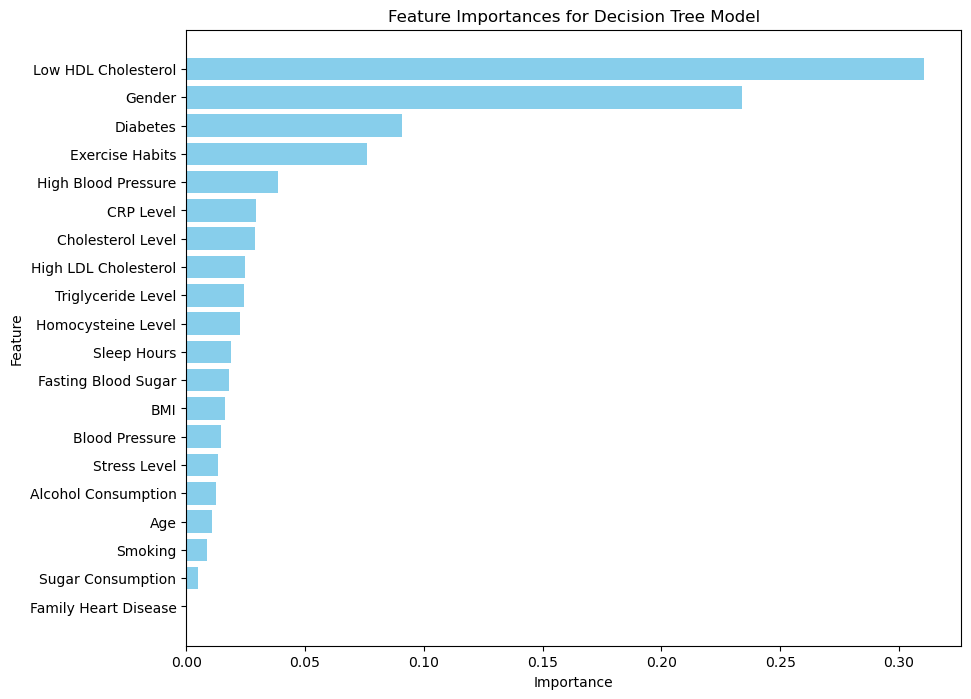

In [49]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Decision Tree Model')
plt.gca().invert_yaxis()  
plt.show()

3- Logistic Regression

In [51]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear"]
}

In [52]:
# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=3000, random_state=42)

In [53]:
# Set up Grid Search
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)

In [54]:
# Fit the Grid Search
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [55]:
# Best Parameters and Accuracy for Logistic Regression
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Accuracy:", grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Accuracy: 0.6648958333333332


In [56]:
# Evaluate the best model on the test set
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Model Accuracy: 0.67375
Confusion Matrix:
 [[1617    0]
 [ 783    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.81      1617
         1.0       0.00      0.00      0.00       783

    accuracy                           0.67      2400
   macro avg       0.34      0.50      0.40      2400
weighted avg       0.45      0.67      0.54      2400



In [57]:
# Define the parameter grid for SVM
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

In [58]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

In [59]:
# Set up Grid Search
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)

In [60]:
# Fit the Grid Search
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [61]:
# Best Parameters and Accuracy for SVM
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)

Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy: 0.7616666666666666


In [62]:
# Evaluate the best model on the test set
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.795
Confusion Matrix:
 [[1617    0]
 [ 492  291]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1617
         1.0       1.00      0.37      0.54       783

    accuracy                           0.80      2400
   macro avg       0.88      0.69      0.70      2400
weighted avg       0.84      0.80      0.76      2400



5- CatBoost Model

In [64]:
# Define the parameter grid for CatBoost
param_grid_catboost = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [3, 5, 10],
    "l2_leaf_reg": [1, 3, 5]
}

In [65]:
# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, silent=True)

In [66]:
# Set up Grid Search
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring="accuracy", n_jobs=-1)

In [67]:
# Fit the Grid Search
grid_search_catboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E34576A060>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [68]:
# Best Parameters and Accuracy for CatBoost
print("Best Parameters for CatBoost:", grid_search_catboost.best_params_)
print("Best Accuracy:", grid_search_catboost.best_score_)

Best Parameters for CatBoost: {'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Accuracy: 0.8302083333333332


In [69]:
# Evaluate the best model on the test set
best_catboost_model = grid_search_catboost.best_estimator_
y_pred_catboost = best_catboost_model.predict(X_test)

# Calculate and print the evaluation metrics
print("CatBoost Model Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))
print("Classification Report:\n", classification_report(y_test, y_pred_catboost))

CatBoost Model Accuracy: 0.84125
Confusion Matrix:
 [[1606   11]
 [ 370  413]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1617
         1.0       0.97      0.53      0.68       783

    accuracy                           0.84      2400
   macro avg       0.89      0.76      0.79      2400
weighted avg       0.87      0.84      0.83      2400



In [70]:
# Get feature importances
feature_importances = best_catboost_model.feature_importances_

In [71]:
# Create a DataFrame to display feature importances
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [72]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                  Feature  Importance
1                 Gender    6.544700
10   Low HDL Cholesterol    6.371562
19    Homocysteine Level    5.962152
0                    Age    5.548507
2         Blood Pressure    5.402682
18             CRP Level    5.291779
14           Sleep Hours    5.253523
3      Cholesterol Level    5.206098
16    Triglyceride Level    5.118735
13          Stress Level    5.034205
17   Fasting Blood Sugar    5.022362
8                    BMI    4.935256
6   Family Heart Disease    4.700415
11  High LDL Cholesterol    4.670989
9    High Blood Pressure    4.579989
7               Diabetes    4.448565
5                Smoking    4.332421
15     Sugar Consumption    4.310436
12   Alcohol Consumption    3.651134
4        Exercise Habits    3.614488


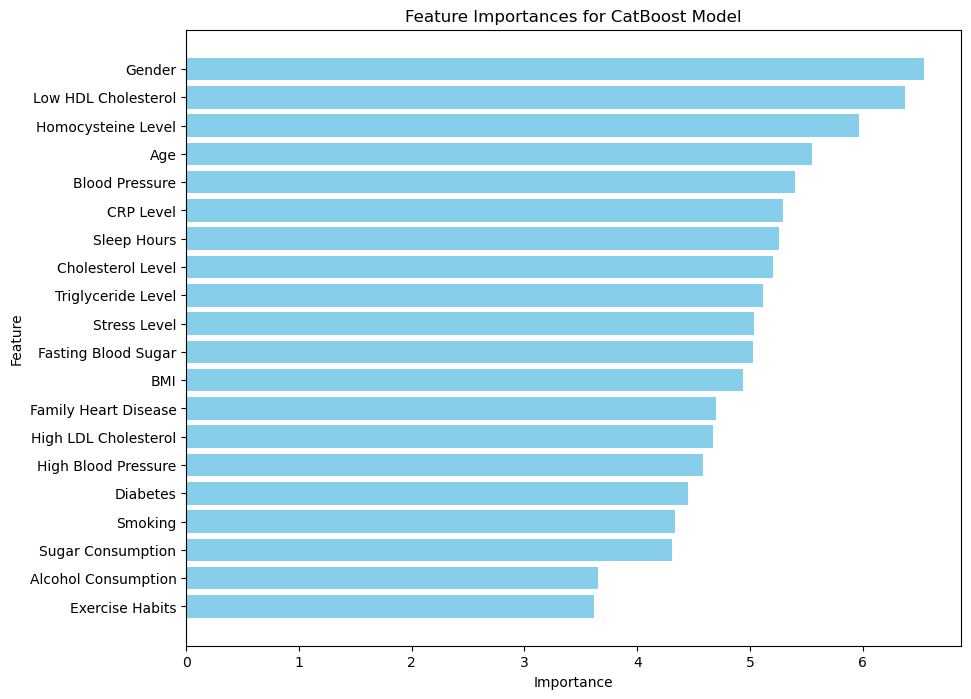

In [73]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for CatBoost Model')
plt.gca().invert_yaxis()  
plt.show()

In [115]:
# Catboost
best_catboost_model.save_model("catboost_model.cbm")

6-  Boosting by using Decision Tree

In [75]:
# Step 1: Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

In [76]:
# Step 2: Initialize the AdaBoost model with a DecisionTreeClassifier as the base estimator
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

In [77]:
# Step 3: Set up Grid Search
grid_search_ada = GridSearchCV(
    boosting_model,
    param_grid_ada,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [78]:
# Step 4: Fit the Grid Search
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [79]:
# Step 5: Print the best parameters and best accuracy
print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print("Best Accuracy:", grid_search_ada.best_score_)

Best Parameters for AdaBoost: {'estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 200}
Best Accuracy: 0.8286458333333334


In [80]:
# Step 6: Evaluate the best model on the test set
best_ada_model = grid_search_ada.best_estimator_
y_pred_ada = best_ada_model.predict(X_test)

# Step 7: Calculate and print the evaluation metrics
print("AdaBoost Model Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Model Accuracy: 0.8425
Confusion Matrix:
 [[1617    0]
 [ 378  405]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      1617
         1.0       1.00      0.52      0.68       783

    accuracy                           0.84      2400
   macro avg       0.91      0.76      0.79      2400
weighted avg       0.87      0.84      0.83      2400



In [81]:
# Get feature importances
feature_importances = best_ada_model.feature_importances_

In [82]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [83]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                  Feature  Importance
6   Family Heart Disease       0.155
9    High Blood Pressure       0.150
10   Low HDL Cholesterol       0.110
7               Diabetes       0.110
5                Smoking       0.105
1                 Gender       0.105
11  High LDL Cholesterol       0.095
13          Stress Level       0.045
15     Sugar Consumption       0.025
19    Homocysteine Level       0.020
8                    BMI       0.020
4        Exercise Habits       0.015
12   Alcohol Consumption       0.015
3      Cholesterol Level       0.005
2         Blood Pressure       0.005
16    Triglyceride Level       0.005
17   Fasting Blood Sugar       0.005
18             CRP Level       0.005
0                    Age       0.005
14           Sleep Hours       0.000


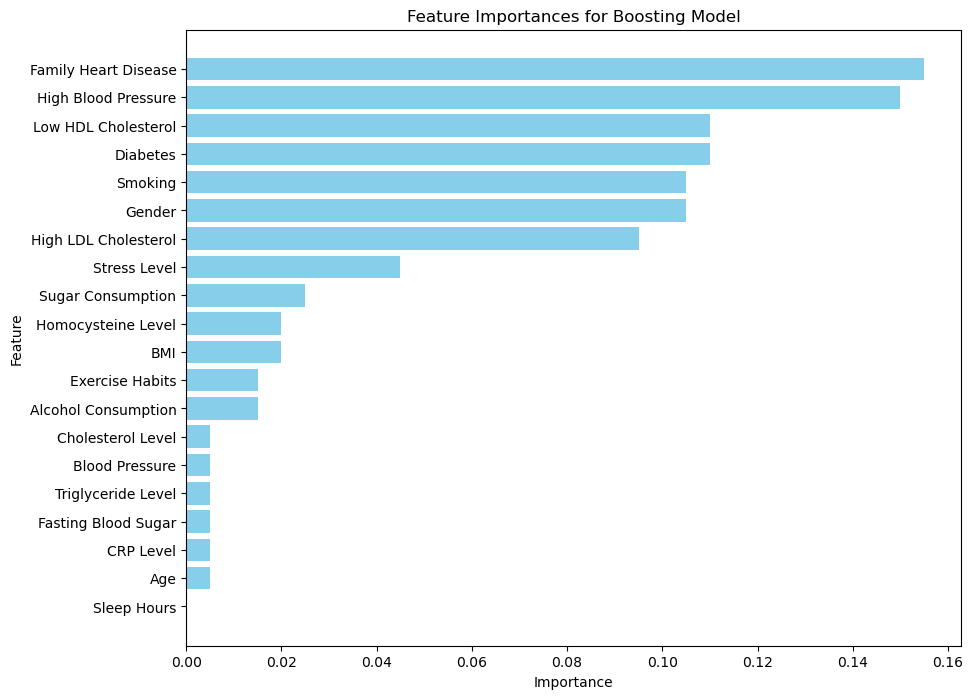

In [84]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Boosting Model')
plt.gca().invert_yaxis()  
plt.show()

Plotting ROC curves for all the models

In [86]:
# Train the Support Vector Machine model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]


In [87]:
# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]


In [88]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [89]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]


In [90]:
# Train the CatBoost model
catboost_model = CatBoostClassifier(silent=True)
catboost_model.fit(X_train, y_train)
y_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]


In [91]:
# Train the AdaBoost model
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
boosting_model.fit(X_train, y_train)
y_prob_boosting = boosting_model.predict_proba(X_test)[:, 1]

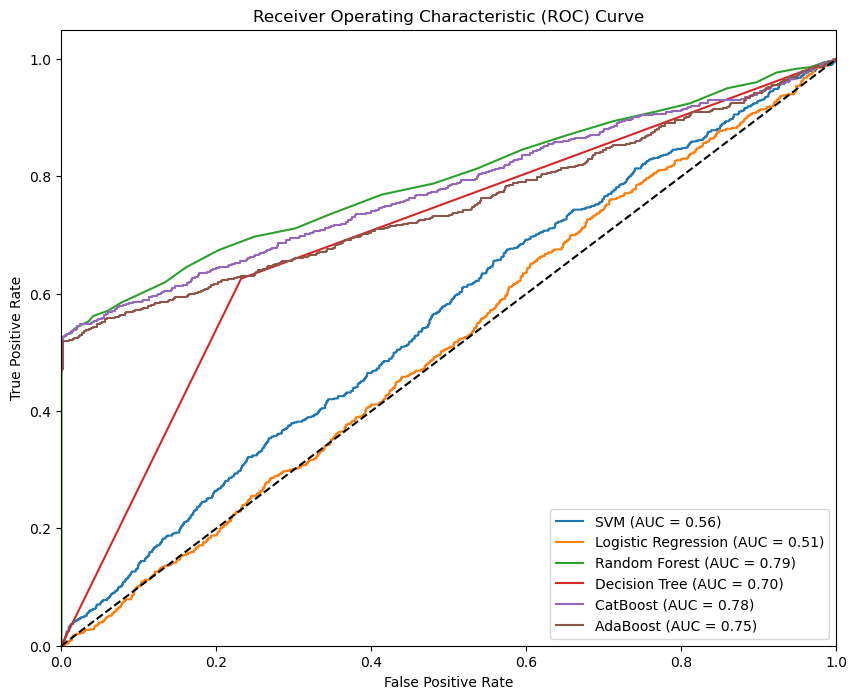

In [92]:
# Plot ROC curves for all the models
plt.figure(figsize=(10, 8))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# CatBoost
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_prob_catboost)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {roc_auc_catboost:.2f})')

# AdaBoost
fpr_boosting, tpr_boosting, _ = roc_curve(y_test, y_prob_boosting)
roc_auc_boosting = auc(fpr_boosting, tpr_boosting)
plt.plot(fpr_boosting, tpr_boosting, label=f'AdaBoost (AUC = {roc_auc_boosting:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Comparison of Model Performance 

In [94]:
# List of models and their predictions
models = [
    ("SVM", y_pred_svm),
    ("Logistic Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("Decision Tree", y_pred_dt),
    ("CatBoost", y_pred_catboost),
    ("AdaBoost", y_pred_ada)
]

In [95]:
# Compute metrics for each model
metrics = []
for name, y_pred in models:
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    metrics.append([name, accuracy, precision, recall, f1_score])

In [96]:
# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(
    metrics,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

In [97]:
# Transpose the DataFrame for plotting
metrics_df.set_index('Model', inplace=True)
metrics_df = metrics_df.transpose()

<Figure size 2000x1000 with 0 Axes>

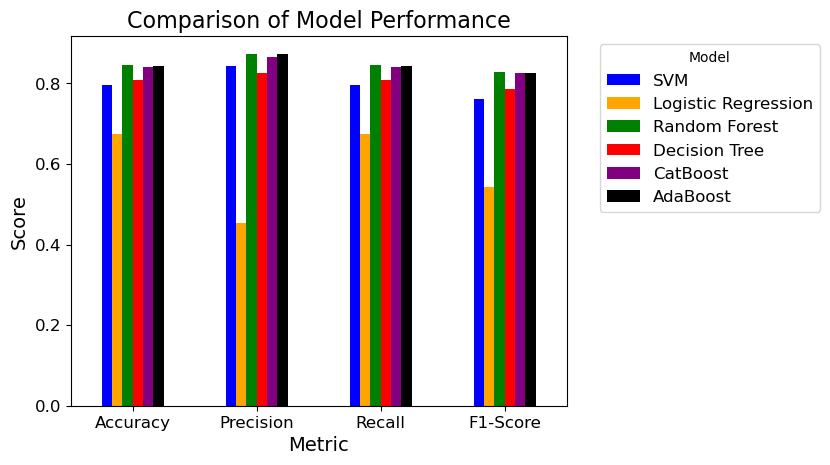

In [98]:
# Plot the bar chart
plt.figure(figsize=(20, 10))
metrics_df.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'black'])
plt.title("Comparison of Model Performance", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()

In [117]:
# Saved Last Dataset
df.to_csv("final_csv.csv",index=False) 